## Generate random data first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.random.normal(size=200)

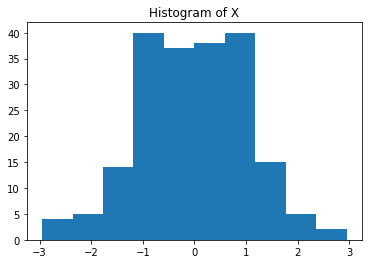

In [3]:
plt.hist(X)
plt.title('Histogram of X');

## Algorithm 1: Generate from kernel density

In [4]:
from statsmodels.nonparametric import kde,bandwidths

In [5]:
np.random.choice(X, size=10)

array([ 0.92644913,  0.28087013,  1.23850774, -1.51442837,  0.48286731,
       -0.70493453, -0.45206154,  0.85572249,  1.23850774,  0.7645989 ])

In [53]:
k1 = kde.KDEUnivariate(X)

In [65]:
k1.fit(kernel="epa", fft=False, bw="scott")

In [66]:
bw_used = bandwidths.bw_scott(X)

In [6]:
def rand_bartlett(size=(1,10)):
    rvs_needed = np.array(size).prod()
    rvs_generated = 0
    out = np.empty(0)
    
    while rvs_generated < rvs_needed:
        X = np.random.uniform(-1.0, 1.0, size=round(rvs_needed*1.5, None))
        U = np.random.uniform(0.0, 1.0, size = X.shape)
        out = np.hstack((out, X[U <= 1 - X**2]))
        
        rvs_generated = out.size
        
    return out[:rvs_needed].reshape(size)   

In [7]:
def rand_from_density(X, size=(1,10), lower=-np.inf, upper=np.inf, batch_size=100):
    rvs_needed = np.array(size).prod()
    bw0 = bandwidths.bw_scott(X)
    
    if (lower is not -np.inf) or (upper is not np.inf):
        rvs_generated = 0
        out = np.empty(0)
        
        while rvs_generated < rvs_needed:
            Y0 = np.random.choice(X, size=batch_size) + rand_bartlett(batch_size)*bw0
            out = np.hstack((out, Y0[np.column_stack((Y0 >= lower,  Y0 <= upper)).all(axis=1)])) 
            rvs_generated = out.size
        
        out = out[:rvs_needed].reshape(size)
    else:
        out = np.random.choice(X, size=rvs_needed) + rand_bartlett(rvs_needed)*bw0

    
    return out

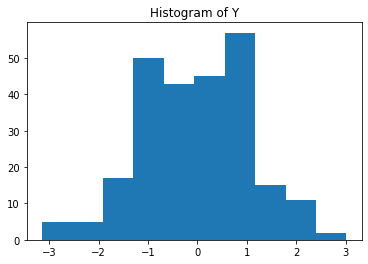

In [10]:
Y = rand_from_density(X, size=250)
plt.hist(Y)
plt.title('Histogram of Y');

## Algorithm 2: From histogram

In [81]:
def rand_from_hist(X, size=(1,10)):
    rvs_needed = np.array(size).prod()
    hist_details = np.histogram(X, bins='fd')
    nbins = len(hist_details[0])
    
    bin_choices = np.random.choice(nbins, size=rvs_needed, p=hist_details[0]/len(X))
    out = np.random.uniform(hist_details[1][bin_choices], hist_details[1][bin_choices+1])
    
    return out

In [92]:
out = rand_from_hist(X, 250)

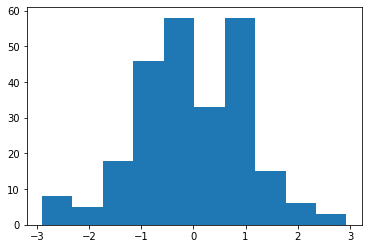

In [94]:
plt.hist(out);

## Algorithm 3: From interpolated cdf

In [111]:
from scipy.interpolate import Akima1DInterpolator
from statsmodels.distributions.empirical_distribution import *

In [142]:
def rand_from_Finv(X, size=(1,10)):
    rvs_needed = np.array(size).prod()
    ecdf1 = ECDF(X)
    U = np.hstack((0.0, ecdf1.y[1:-1], 1.0))
    Finv = np.hstack((X.min(), ecdf1.x[1:-1], X.max()))
    ak2 = Akima1DInterpolator(U, Finv)

    U_rand = np.random.uniform(size=rvs_needed)
    out = ak2(U_rand).reshape(size)
    return out
    

In [135]:
rand_from_Finv(X)

In [133]:
U.min()

0.005

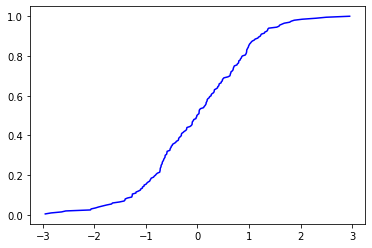

In [127]:
plt.plot(ecdf1.x, ecdf1.y, 'b-');

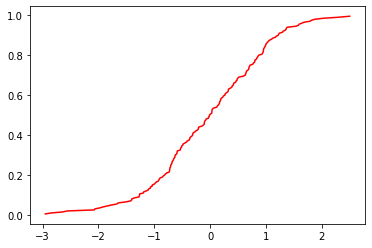

In [130]:
plt.plot(ecdf1.x[1:-1], ak_out(ecdf1.x[1:-1]), 'r-');

## Comparing outputs

In [154]:
X_from_dens = rand_from_density(X, size=200)
X_from_hist = rand_from_hist(X, 200)
X_from_F = rand_from_Finv(X, 200)

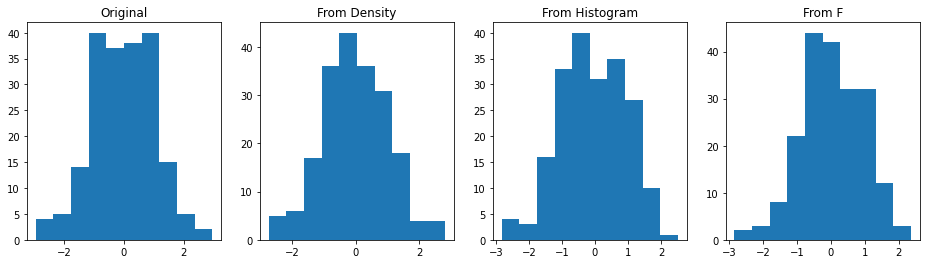

In [155]:
plt.subplots(1,4, figsize=(16,4))
plt.subplot(141)
plt.hist(X);
plt.title("Original");

plt.subplot(142)
plt.hist(X_from_dens);
plt.title("From Density");

plt.subplot(143)
plt.hist(X_from_hist);
plt.title("From Histogram");

plt.subplot(144)
plt.hist(X_from_F)
plt.title("From F");

In [55]:
len(hist_details[0])

10

In [80]:
hist_details[1][out+1]

array([ 2.36006269e+00, -5.90277921e-01, -2.09799004e-04,  1.76999457e+00,
        2.36006269e+00])

In [40]:
np.random.uniform(np.array([0.1, 0.2]), np.array([9, 10.]))

array([0.45110781, 2.23559476])

In [44]:
np.random.choice(10, size=10)

array([7, 5, 1, 0, 3, 0, 2, 9, 3, 7])

In [37]:
hist_details[0]

array([ 4,  5, 14, 40, 37, 38, 40, 15,  5,  2])

In [10]:
BB = rand_bartlett(size=1000)

In [13]:
BB.shape[0]

1000

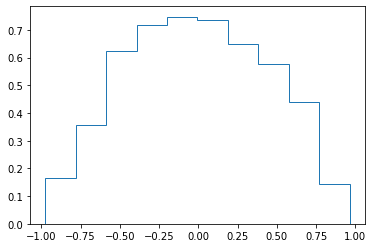

In [75]:
plt.hist(BB, density=True, histtype='step' );

In [66]:
tmp.reshape((2,5))

array([[-0.55343223,  0.59036993,  0.95141438,  0.07449957, -0.6755122 ],
       [ 0.0816377 , -0.57970599,  0.20499574, -0.05025981,  0.3173002 ]])

In [55]:
np.empty(0).size

0

In [25]:
tmp = (1,10)
np.array(tmp).prod()

10

In [5]:
d = np.random.rand(6,5,4)

In [8]:
d.size

120

In [13]:
np.random.chisquare?

Docstring:
chisquare(df, size=None)

Draw samples from a chi-square distribution.

When `df` independent random variables, each with standard normal
distributions (mean 0, variance 1), are squared and summed, the
resulting distribution is chi-square (see Notes).  This distribution
is often used in hypothesis testing.

.. note::
    New code should use the ``chisquare`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
df : float or array_like of floats
     Number of degrees of freedom, must be > 0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``df`` is a scalar.  Otherwise,
    ``np.array(df).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized chi-square distribution.

Raises
------
ValueError
    When 